###  Importing some useful libraries

In [ ]:
#pip install webdriver-manager

In [ ]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
#from selenium import webdriver # use for automation chrome 

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [ ]:
# pip install selenium 

In [ ]:
# import selenium
# selenium.__file__
# from selenium import webdriver

In [ ]:
phish_data = pd.read_csv('/content/phishing_site_urls.csv') #loading the dataset

In [ ]:
phish_data.head() #Displaying the dataset top 5 values

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
phish_data.tail() #last 5 values

,URL,Label
549345,apple-search.info,bad
549346,https://www.jiit.ac.in/,good
549347,https://www.geeksforgeeks.org/,good
549348,https://resident.uidai.gov.in/verify,good
549349,https://resident.uidai.in/verify,bad


In [ ]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549350 entries, 0 to 549349
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549350 non-null  object
 1   Label   549350 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
phish_data.isnull().sum() #total null values

URL      0
Label    0
dtype: int64

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

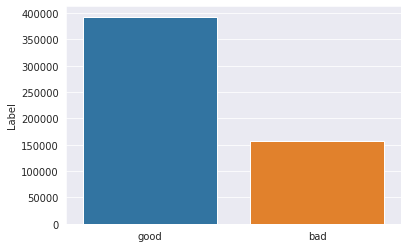

In [ ]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
print('Getting words tokenized ...')

phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows

Getting words tokenized ...


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
11076,paypal.com.cy.cgi.bin.webscr.cmd.login.submit....,bad,"[paypal, com, cy, cgi, bin, webscr, cmd, login..."
115305,mummyschildcare.com/shobhanvijay/advance/i/oth...,bad,"[mummyschildcare, com, shobhanvijay, advance, ..."
12770,secure.runescape.com.m-weblognis.tk/m=forum/fo...,bad,"[secure, runescape, com, m, weblognis, tk, m, ..."
440626,superiorpics.com/lorenzo_lamas/,good,"[superiorpics, com, lorenzo, lamas]"
115453,b2bcollectiv.co.za/wp-content/themes/twentyfou...,bad,"[b, bcollectiv, co, za, wp, content, themes, t..."


In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
print('Getting words stemmed ...')
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

Getting words stemmed ...


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
396791,mylife.com/gregryleroux,good,"[mylife, com, gregryleroux]","[mylif, com, gregryleroux]"
420325,rauzulusstreet.com/baseball/mlb/montrealseason...,good,"[rauzulusstreet, com, baseball, mlb, montreals...","[rauzulusstreet, com, basebal, mlb, montrealse..."
50799,www.sigmazone.com/qfdxl.htm,good,"[www, sigmazone, com, qfdxl, htm]","[www, sigmazon, com, qfdxl, htm]"
315340,dishant.com/album/Josh_-_Main_Hoon_Tanha.html,good,"[dishant, com, album, Josh, Main, Hoon, Tanha,...","[dishant, com, album, josh, main, hoon, tanha,..."
436820,spokeo.com/John+Bolen,good,"[spokeo, com, John, Bolen]","[spokeo, com, john, bolen]"


In [ ]:
print('Getting joiningwords ...')
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))

Getting joiningwords ...


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
168052,editorinleaf.com/2011/04/21/leafs-best-shootou...,good,"[editorinleaf, com, leafs, best, shootout, goa...","[editorinleaf, com, leaf, best, shootout, goal...",editorinleaf com leaf best shootout goal of
119696,tt-karaj.ir/modules/mod_feed/tmpl/-/Gouv_lmpou...,bad,"[tt, karaj, ir, modules, mod, feed, tmpl, Gouv...","[tt, karaj, ir, modul, mod, feed, tmpl, gouv, ...",tt karaj ir modul mod feed tmpl gouv lmpout re...
459963,vintagecardprices.com/search.php?action=getSet...,good,"[vintagecardprices, com, search, php, action, ...","[vintagecardpric, com, search, php, action, ge...",vintagecardpric com search php action getset f...
447395,ticketsinventory.com/mlb/kansas-city-royals-ti...,good,"[ticketsinventory, com, mlb, kansas, city, roy...","[ticketsinventori, com, mlb, kansa, citi, roya...",ticketsinventori com mlb kansa citi royal tick...
48806,www.biconet.com/flies.html,good,"[www, biconet, com, flies, html]","[www, biconet, com, fli, html]",www biconet com fli html


In [ ]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [ ]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [ ]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

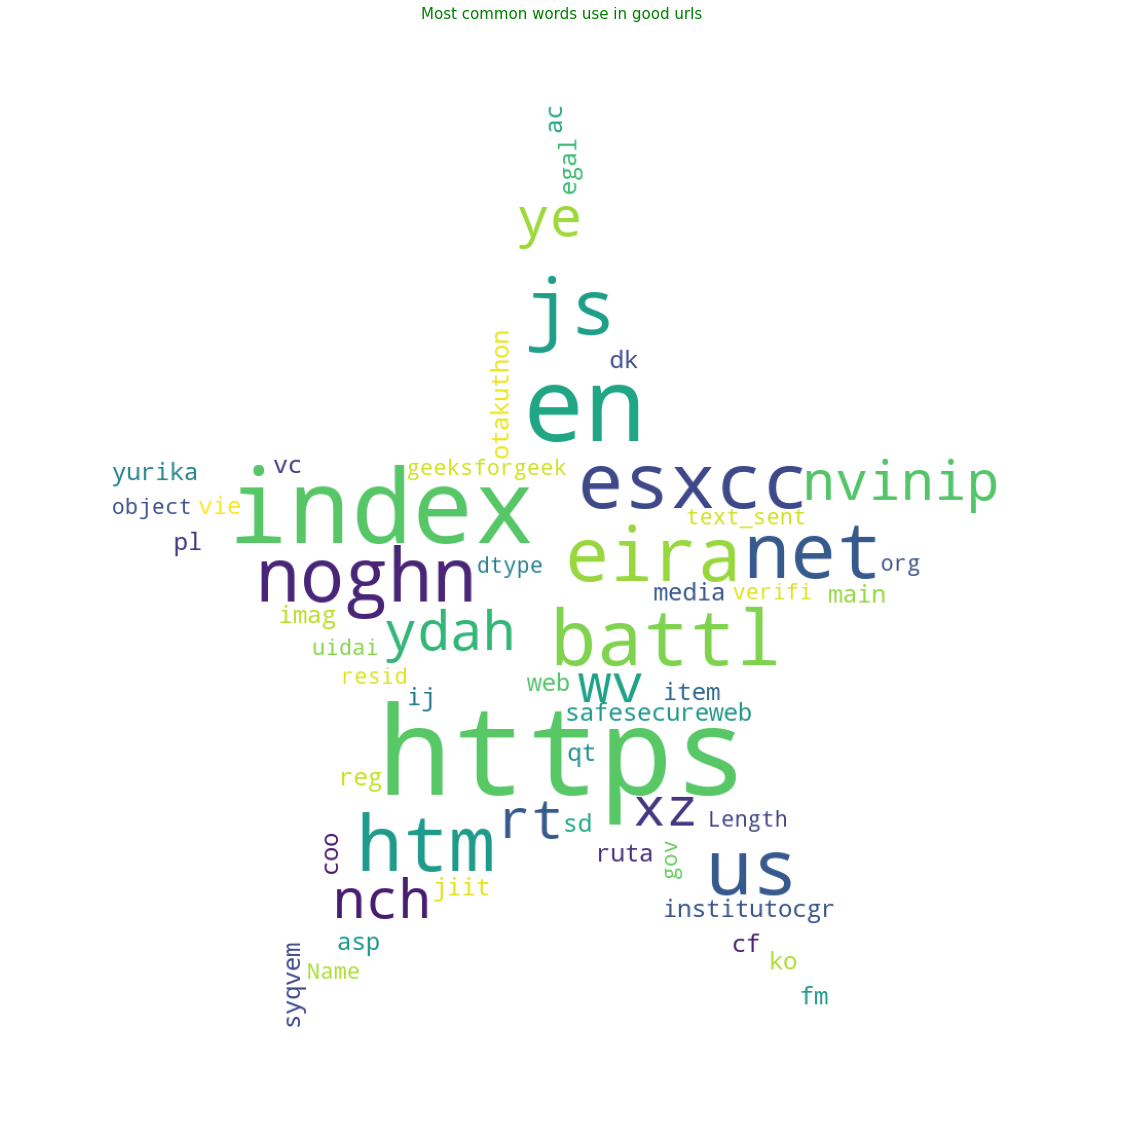

In [ ]:
common_text = str(data)
common_mask = np.array(Image.open('/content/star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [ ]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

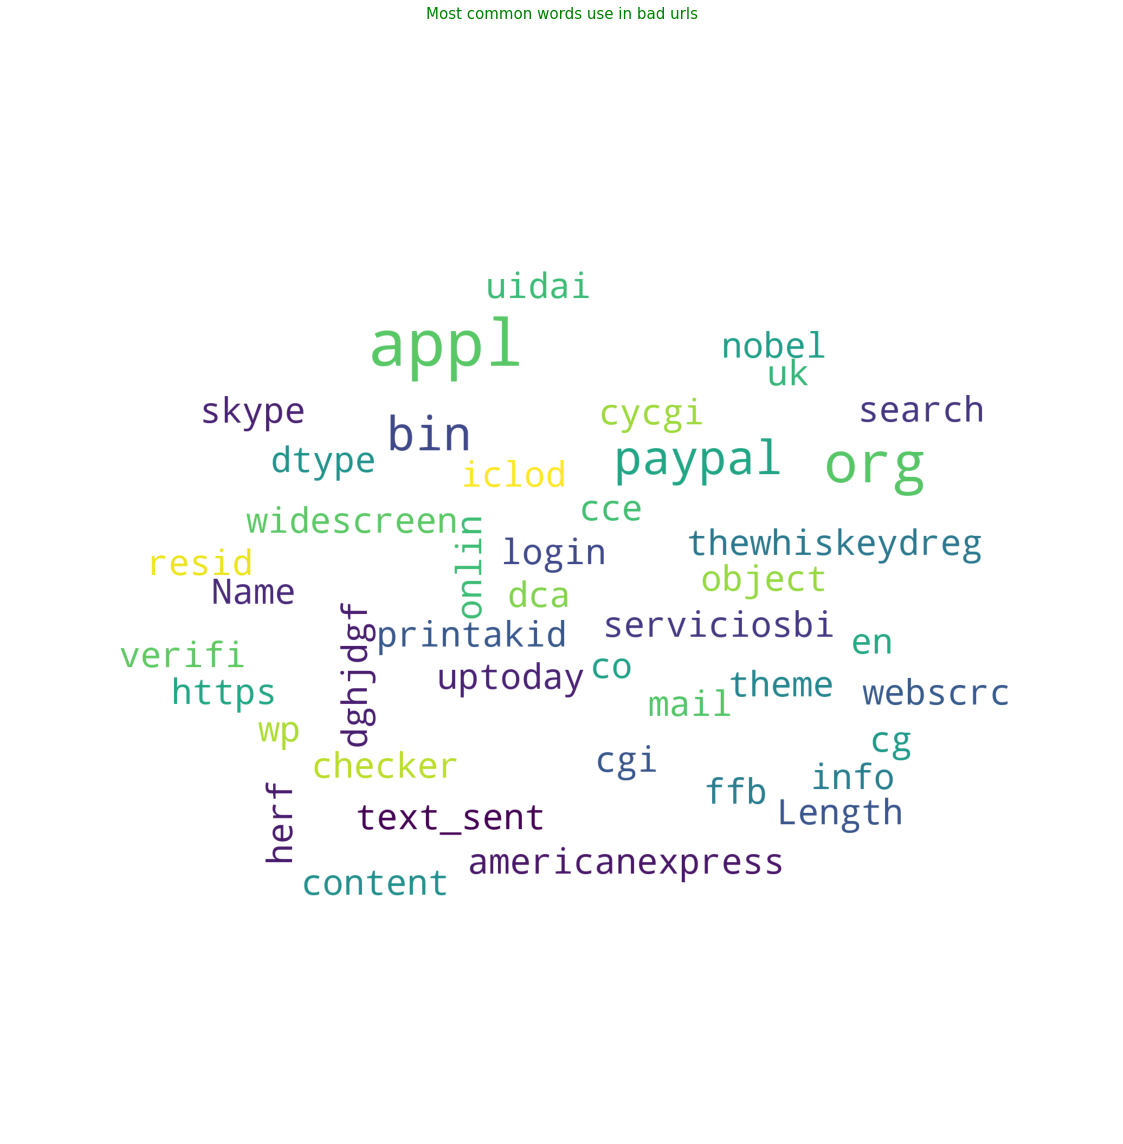

In [ ]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
browser.get("https://www.webite-url.com")

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
list_urls = ['https://www.republicworld.com/topics/filmy4wap'] #here i take phishing sites 
links_with_text = []

In [ ]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

In [ ]:
links_with_text[:5]

[['https://www.republicworld.com/topics/filmy4wap',
  'https://www.republicworld.com/privacy-policy'],
 ['https://www.republicworld.com/topics/filmy4wap', None],
 ['https://www.republicworld.com/topics/filmy4wap',
  'https://bharat.republicworld.com/'],
 ['https://www.republicworld.com/topics/filmy4wap',
  'https://www.republicworld.com/'],
 ['https://www.republicworld.com/topics/filmy4wap',
  'https://www.republicworld.com/livetv.html']]

In [ ]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [ ]:
df.head()

,from,to
0,https://www.republicworld.com/topics/filmy4wap,https://www.republicworld.com/privacy-policy
1,https://www.republicworld.com/topics/filmy4wap,None
2,https://www.republicworld.com/topics/filmy4wap,https://bharat.republicworld.com/
3,https://www.republicworld.com/topics/filmy4wap,https://www.republicworld.com/
4,https://www.republicworld.com/topics/filmy4wap,https://www.republicworld.com/livetv.html


In [ ]:
#create cv object
cv = CountVectorizer()

In [ ]:
#help(CountVectorizer())

In [ ]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### * Spliting the data 

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression


In [ ]:
# create lr object
lr = LogisticRegression()

In [ ]:
lr.fit(trainX,trainY)

LogisticRegression()

In [ ]:
lr.score(testX,testY)

0.9639211288936784

Training Accuracy : 0.9792117705309554
Testing Accuracy : 0.9639211288936784

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36555
        Good       0.99      0.96      0.98    100783

    accuracy                           0.96    137338
   macro avg       0.95      0.97      0.95    137338
weighted avg       0.97      0.96      0.96    137338


CONFUSION MATRIX


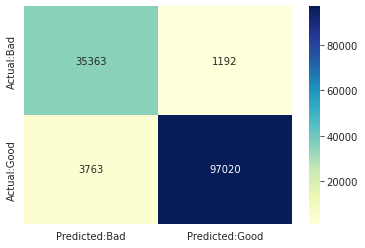

In [ ]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [ ]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [ ]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [ ]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline_ls.score(testX,testY) 

0.9662802720295912

Training Accuracy : 0.9803063988427522
Testing Accuracy : 0.9662802720295912

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36769
        Good       0.99      0.97      0.98    100569

    accuracy                           0.97    137338
   macro avg       0.95      0.97      0.96    137338
weighted avg       0.97      0.97      0.97    137338


CONFUSION MATRIX


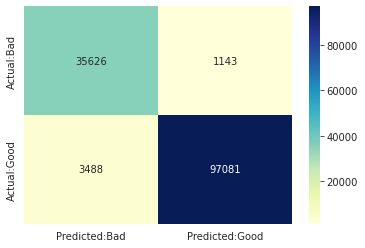

In [ ]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9662802720295912


In [ ]:

predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']


In [ ]:
predict_bad = ['2minutesloan']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
print(result)


['bad']
